# 回帰(ノンパラメトリック手法)

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1015)

## 問題設定

In [116]:
n = 20  #データ数
X_n = 1000 #任意のxの数(グラフの解像度にもなる)

x = np.linspace(-np.pi,np.pi,n)+ np.random.randn(n)/4 #データ 
t = np.sin(x) + np.random.randn(n)*0.1 # ラベル

x_star = np.linspace(-np.pi*2.0,np.pi*2.0,X_n) # 任意のx
y = np.sin(X) # 真の関数

#1f77b4
(5,)
(5,)


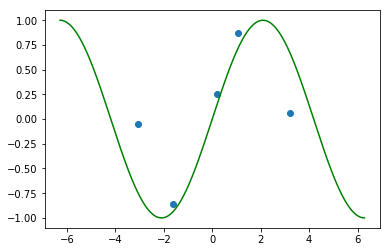

In [117]:
# initial plot
plt.plot(x_star,y,color='g')
plt.scatter(x,t)

## k近傍

In [118]:
k = 4 # NumpyのBroad cast と fancy indexは神
Delta = x[:,None] - x_star[None,:] #データ点と任意のxを全ての差を計算
Dist = np.square(Delta) #距離として扱う
neighbor_index = np.argsort(Dist, axis=0)[:k,:] #小さい順にソートし、k個の近傍のindexを得る
Y = np.sum(t[neighbor_index],axis=0)/k #今回は平均をとる 

#1f77b4
(20,)
(20,)


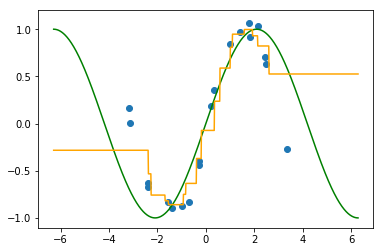

In [63]:
## show result
plt.plot(x_star,y,color='g')
plt.scatter(x,t)
plt.plot(x_star,Y,color='orange')

#1f77b4
(20,)
(20,)


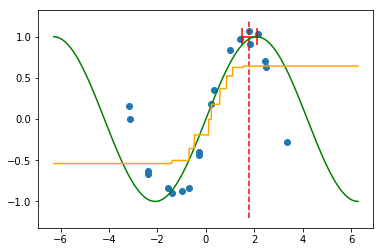

In [56]:
# initial plot
p = plt.plot(x_star,y,color='g')
p = plt.vlines([1.8], -1.2, 1.2, "red", linestyles='dashed')
p = plt.hlines([1.0], 1.5, 2.1, "red")
p = plt.vlines([1.5], 0.9, 1.1, "red")
p = plt.vlines([2.1], 0.9, 1.1, "red")
p = plt.scatter(x,t)
p = plt.plot(x_star,Y,color='orange')
plt.show(p)

## Nadaraya-Watson

In [ ]:
n = 5  #データ数
X_n = 1000 #任意のxの数(グラフの解像度にもなる)

x = np.linspace(-np.pi,np.pi,n)+ np.random.randn(n)/4 #データ 
t = np.sin(x) + np.random.randn(n)*0.1 # ラベル

x_star = np.linspace(-np.pi*2.0,np.pi*2.0,X_n) # 任意のx
y = np.sin(X) # 真の関数

In [119]:
def NW(sigma=0.1):
    global H, R, Y
    Delta = x[:,None] - x_star[None,:] #データ点と任意のx_starを全ての距離をnumpyのBroad castで計算している
    Dist = np.square(Delta)
    H = np.exp(-0.5/sigma * Dist) #近傍半径が大きいほど、距離をあまり考慮しなくなるのがわかる
    G = np.sum(H, axis=0)[None,:] 
    R = H/G
    check_sum = np.sum(R, axis=0)
    # print(check_sum)
    Y = R.T@t #(任意のx_starの数,データ数) x_star (データ数, ラベルの次元(今回は1))

## 近傍半径 0.2

In [139]:
sigma = 0.2 #近傍半径 
NW(sigma)

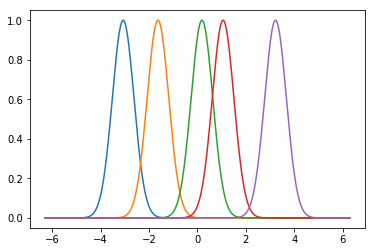

In [140]:
# H
for i in range(n):
    plt.plot(x_star,H[i,:])

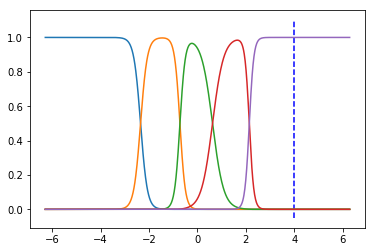

In [141]:
# R
for i in range(n):
    p = plt.plot(x_star,R[i,:])
    
p = plt.vlines([4.0], -0.05, 1.1, "blue", linestyles='dashed')
plt.show(p)

#1f77b4
(5,)
(5,)


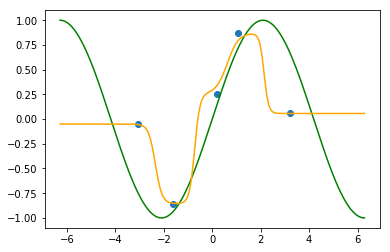

In [142]:
## Y
plt.plot(x_star,y,color='g')
plt.scatter(x,t)
plt.plot(x_star,Y,color='orange')

## 近傍半径 2.0

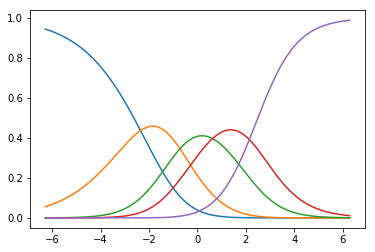

In [143]:
sigma = 2.0 #近傍半径 
NW(sigma)
# R
for i in range(n):
    p = plt.plot(x_star,R[i,:])
    
plt.show(p)

#1f77b4
(5,)
(5,)


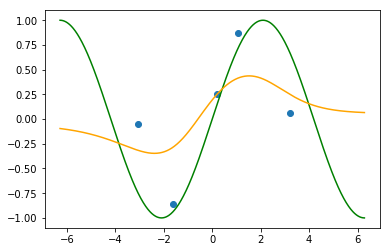

In [144]:
## Y
plt.plot(x_star,y,color='g')
plt.scatter(x,t)
plt.plot(x_star,Y,color='orange')

## 近傍半径 10000.0

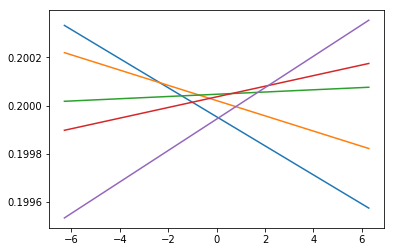

In [145]:
sigma = 10000.0 #近傍半径 
NW(sigma)
# R
for i in range(n):
    p = plt.plot(x_star,R[i,:])
    
plt.show(p)

#1f77b4
(5,)
(5,)


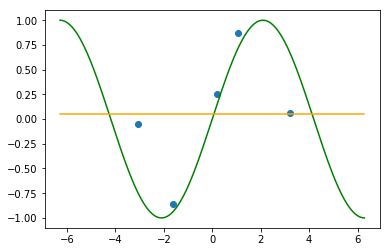

In [146]:
## Y
plt.plot(x_star,y,color='g')
plt.scatter(x,t)
plt.plot(x_star,Y,color='orange')

## 近傍半径 0.001

/Users/miyazakikazuki/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


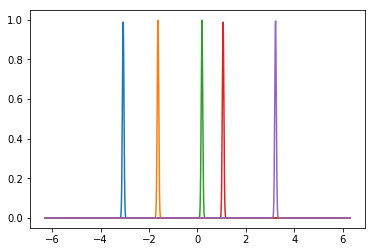

In [130]:
sigma = 0.001 #近傍半径 
NW(sigma)
for i in range(n):
    plt.plot(x_star,H[i,:])

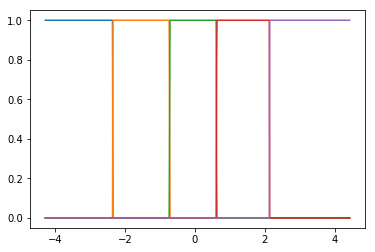

In [131]:
for i in range(n):
    p = plt.plot(x_star,R[i,:])
    
plt.show(p)

#1f77b4
(5,)
(5,)


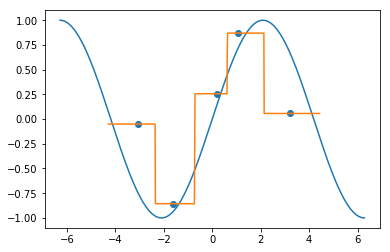

In [132]:
## Y
plt.plot(x_star,y)
plt.scatter(x,t)
plt.plot(x_star,Y)

### k近傍法(k=1)

#1f77b4
(5,)
(5,)


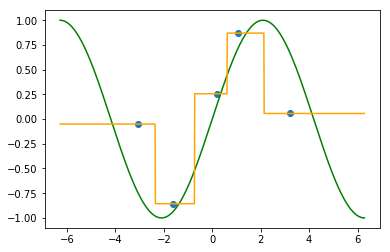

In [147]:
k = 1 # NumpyのBroad cast と fancy indexは神
Delta = x[:,None] - x_star[None,:] #データ点と任意のxを全ての差を計算
Dist = np.square(Delta) #距離として扱う
neighbor_index = np.argsort(Dist, axis=0)[:k,:] #小さい順にソートし、k個の近傍のindexを得る
Y = np.sum(t[neighbor_index],axis=0)/k #今回は平均をとる 
## show result
plt.plot(x_star,y,color='g')
plt.scatter(x,t)
plt.plot(x_star,Y,color='orange')